# Project 1, due Oct the 7th, 11:59pm

Rules

1) submit your .ipynb file by email, titled "CMP SC ECE: 4001-7001: Project 1: XXX", where XXX is your name.

2) your file should be named Project1_XXX.ipynb, where XXX is your name.

3) clear all cells before submitting.

You can use 

1) our class notes (PPTs)

2) your book

3) any Jupyter pages so far

4) webpages on the internet (e.g., Wikipedia)

You CANNOT 

1) work with anyone else (e.g., someone in the class, on the intenet, robot, etc.)

NO late submissions will be accepted.

Do the following tasks with respect to the Indian Pines data set (and its ground truth).

OK, so lets load the Indian Pines

In [1]:
import scipy.io
from PIL import Image
import numpy as np

mat = scipy.io.loadmat('/dsa/git/LecWeek3/Indian_pines.mat')
data = mat['indian_pines']
Xdim, Ydim, Bands = data.shape
print( data.shape )

(145, 145, 220)


Next, load the Indian Pines ground truth

In [2]:
mat2 = scipy.io.loadmat('/dsa/git/LecWeek3/Indian_pines_gt.mat')
data2 = mat2['indian_pines_gt']

NoLabels = np.amax(data2)
print( NoLabels )

16


Here is some simply Python code to help you find which pixels are a certain class

In [3]:
# labels
classlabels = [ "No class", "Alfalfa", "Corn-notill", "Corn-mintill", "Corn", "Grass-pasture", "Grass-trees", "Grass-pasture-mowed", "Hay-windrowed", "Oats", "Soybean-notill", "Soybean-mintill", "Soybean-clean", "Wheat", "Woods", "Buildings-grass-trees-dives", "Stone-steel-towers" ]

# which class?
which_class = 12


# what locations?
#
# as an image
WhatLocsImg = np.where( data2 == which_class , 1, 0 ) # so, 1 is our class, 0 is not (or white and black)
# what specific indices
WhatLocs = np.where( data2 == which_class )
# get in 2D index form
i1 = WhatLocs[0]
i2 = WhatLocs[1]
print( "An example index is: " + str(i1[0]) + " " + str(i2[0]) )
print( "There are " + str(i1.size) + " pixels in this class" )

# show the image
print( classlabels[which_class] )
result = np.uint8(WhatLocsImg*255)
display(Image.fromarray(result).resize((250,250),Image.NEAREST))

An example index is: 2 28
There are 593 pixels in this class
Soybean-clean


Few last comments.

The indian pines data set has 220 bands. (what I gave you!)

Wavelengths span 0.4–2.5 $\mu$m.

Each pixel is approx 20m (spatial)

Water absorption bands are 104–108, 150–163, and 220

Now, on to the stuff that you need to do!!!

# Task 1 (everyone)

1) Prompt the user for a class (one of 16) and compute (in Python) its mean and covariance matrix [make this its own cell]

2) Plot (via plt.plot(...)) the mean signature. Label the x-axis w.r.t. waveform. [make this its own cell]

3) Plot (as an image) the covariance matrix of the user selected class. [make this its own cell]

note: I recommend you make cells, but make 1), 2), and 3) functions.

In [4]:
### Prompt the user for which class to work with
which_class = int(input("What class? {1, 2, ..., 16}: "))
print( "Class selected: " + str(which_class) )



What class? {1, 2, ..., 16}: 15
Class selected: 15


In [5]:
### Mean and Covariance Matrix
WhatLocs = np.where( data2 == which_class)
# this returns us back the (x,y) pixels that were class 16
# I store the x's into i1 and y's into i2
# you can see how many there are w.r.t. i1.size (i2.size is same length)
i1 = WhatLocs[0]
i2 = WhatLocs[1]

X = np.zeros(shape=(i1.size,Bands)) # allocate our data set
print(i1.size)
print(Ydim)
for i in range(i1.size): 
    X[i,:] = data[i1[i],i2[i],:]
    
# print(X)
m = np.mean( X, axis=0 )
# print(m)

386
145


In [6]:
### Mean Graph


import matplotlib.pyplot as plt

plt.plot( m , 'r' )
plt.xlabel('bands')
plt.show()



<Figure size 640x480 with 1 Axes>

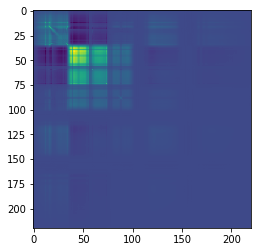

In [7]:
### Covariance
C = np.cov( np.transpose(X) )

# scale for display
CovScale = C
MaxVal = np.amax( CovScale )
CovScale = (CovScale / MaxVal) * 255
plt.imshow(CovScale)
plt.show()
# print(C)

# Task 2 (everyone)

Run ACE, where

$\text{ACE}(x_{(i,j)};(s,\mu,\Sigma)) = \frac{ \left[(s-\mu)^T \Sigma^{-1} (x_{(i,j)}-\mu)\right] \left[(s-\mu)^T \Sigma^{-1} (x_{(i,j)}-\mu)\right] }{\left[(s-\mu)^T \Sigma^{-1} (s-\mu)\right] \left[(x_{(i,j)}-\mu)^T \Sigma^{-1} (x_{(i,j)}-\mu)\right]}$

where

1) $x_{(i,j)}$ is the signal at the pixel under investigation

2) $s$ is the signal we are trying to match

3) $(\mu,\Sigma)$ are statistics we compute "some how" (see below)

In Task 2, I want you to:

1) make $s$ the mean of the class we selected in Task 1

2) make $(\mu,\Sigma)$ the global (the entire image) mean and covariance

note: show it "raw" and scaled to [0, largest ACE value observed in the image], prompt the user for which to do

In [8]:
# global mean
gm = np.zeros(shape=(1,Bands)) # allocate our data
for i in range(Xdim): 
    for j in range(Ydim):
        gm = gm + data[i,j,:]
gm = gm / (Xdim * Ydim)

# global covariance
C = np.zeros(shape=(Bands,Bands))
for i in range(Xdim): 
    for j in range(Ydim):
        DiffVec = data[i,j,:] - gm
        C = C + np.outer( DiffVec , DiffVec )
C = C / (Xdim * Ydim - 1)

covInv = np.linalg.inv(C)

Scaled Result (Enter 1) or RAW Result (Enter 2) 1
Scaled Result


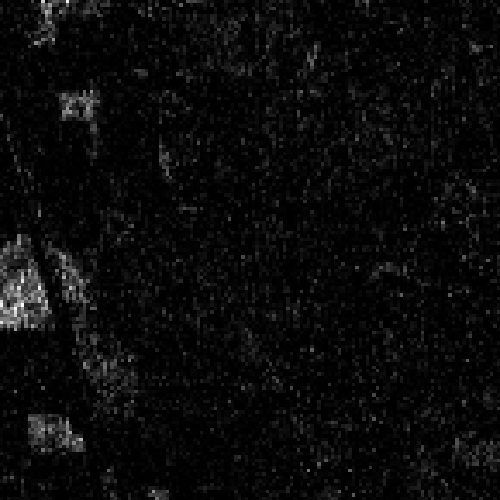

In [9]:
# now, lets process each pixel!
ACEresult = np.zeros(shape=(Xdim,Ydim))
# print("Get a cup of coffee")
for i in range(Xdim):
    for j in range(Ydim):
         #Run ACE
        su = (m.T-gm).T
        xu = (data[i,j,:]-gm).T
        tl = np.matmul(su.T,np.matmul(covInv,xu))
        bl = np.matmul(np.matmul(su.T,covInv),su)
        br = np.matmul(np.matmul(xu.T,covInv),xu)

        result = (tl*tl)/(bl*br)
        ACEresult[i,j] = result
        
        # replace 1 with your calculation!!!
                           # that is, 
                           # "x" is data[i,j,:]
                           # "s" is m (should do a transpose if you used np.mean)
                           # "mu" is gm
                           # "sigma" is C
# lets show it

ACEresultRAW = ACEresult.copy()

newm = np.amin(ACEresult)
ACEresult = ACEresult - newm
newm = np.amax(ACEresult)
ACEresult = (ACEresult / newm) * 255

# now, we make our image and fill it (the slow way!)
showScaled = int(input("Scaled Result (Enter 1) or RAW Result (Enter 2) "))
if(showScaled == 1):
    print("Scaled Result")
    scaledResult = Image.new("RGB", (Xdim, Ydim))
    for i in range(Xdim):
        for j in range(Ydim):
            scaledResult.putpixel( (i,j) , (int(ACEresult[i,j]),int(ACEresult[i,j]),int(ACEresult[i,j]) ) )
    display(scaledResult.resize((500,500),Image.NEAREST))

else:

        # now, we make our image and fill it (the slow way!)
    print("RAW Result")
    rawResult = Image.new("RGB", (Xdim, Ydim))
    for i in range(Xdim):
        for j in range(Ydim):
            rawResult.putpixel( (i,j) , (int(ACEresultRAW[i,j]),int(ACEresultRAW[i,j]),int(ACEresultRAW[i,j]) ) )

    display(rawResult.resize((500,500),Image.NEAREST))

# Task 3 (everyone)

Run ACE, where

$\text{ACE}(x_{(i,j)};(s,\mu,\Sigma)) = \frac{ \left[(s-\mu)^T \Sigma^{-1} (x_{(i,j)}-\mu)\right] \left[(s-\mu)^T \Sigma^{-1} (x_{(i,j)}-\mu)\right] }{\left[(s-\mu)^T \Sigma^{-1} (s-\mu)\right] \left[(x_{(i,j)}-\mu)^T \Sigma^{-1} (x_{(i,j)}-\mu)\right]}$

where

1) $x_{(i,j)}$ is the signal at the pixel under investigation

2) $s$ is the signal we are trying to match

3) $(\mu,\Sigma)$ are statistics we compute "some how" (see below)

In Task 3, I want you to:

1) make $s$ the mean of the class we selected in Task 1

2) make $(\mu,\Sigma)$ the local (with respect to a user defined local window (prompt the user for the size of the local window)) mean and covariance

What Local Window Size? {1, 2, ..., 145}: 5
please wait


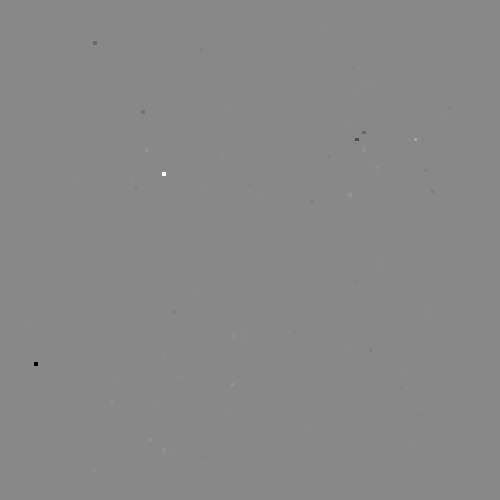

In [10]:

toolbar_width = 40

# setup toolbar
# sys.stdout.write("[%s]" % (" " * toolbar_width))
# sys.stdout.flush()
# sys.stdout.write("\b" * (toolbar_width+1)) # return to start of line, after '['


m = np.mean( X, axis=0 )
# print(m)
w = int(input("What Local Window Size? {1, 2, ..., 145}: "))
# w=3
# now, lets process each pixel!
ACEresult = np.zeros(shape=(Xdim,Ydim))

print("please wait")      
for i in range(w,Xdim-w,1):
    for j in range(w,Ydim-w,1):
        dataset = np.ndarray( shape=((w*2+1)*(w*2+1),Bands) )
        ctr = 0
        #Create dataset for the local window
        for a in range(-w,w+1,1):
            for b in range(-w,w+1,1):
                dataset[ctr,:] = data[i+a,j+b,:]
                ctr = ctr + 1

        lm = np.mean(dataset)

        C = np.cov(np.matrix.transpose(dataset))
        covInv = np.linalg.inv(C)
        
        
    #         for a in range(-w,w+1,1):
    #             for b in range(-w,w+1,1):
    #                 lm = lm + data[i+a,j+b,:]
    
    #         lm = lm / ((w*2+1)*(w*2+1))
    #         lm = np.mean(DataSet)
    #         print(lm)
#             for a in range(-w,w+1,1):
#                 for b in range(-w,w+1,1):
#                     DiffVec = data[i+a,j+b,:] - lm
#                     C + np.outer( DiffVec , DiffVec )

#             C = C / ((w*2+1)*(w*2+1))


#             covInv = C
        #Run ACE
        su = (m.T-lm).T
        xu = (data[i,j,:]-lm).T
        tl = np.matmul(su.T,np.matmul(covInv,xu))
        bl = np.matmul(np.matmul(su.T,covInv),su)
        br = np.matmul(np.matmul(xu.T,covInv),xu)

        result = (tl*tl)/(bl*br)
        ACEresult[i,j] = result

#         sys.stdout.write(str(i)+"-"+str(j)+",")
#         sys.stdout.flush()

            # replace 1 with your calculation!!!
                               # that is, 
                               # "x" is data[i,j,:]
                               # "s" is m (should do a transpose if you used np.mean)
                               # "mu" is gm
                               # "sigma" is C
# lets show it
# sys.stdout.write("\n")

newm = np.amin(ACEresult)
ACEresult = ACEresult - newm
newm = np.amax(ACEresult)
ACEresult = (ACEresult / newm) * 255

# now, we make our image and fill it (the slow way!)
scaledResult = Image.new("RGB", (Xdim, Ydim))
for i in range(Xdim):
    for j in range(Ydim):
        scaledResult.putpixel( (i,j) , (int(ACEresult[i,j]),int(ACEresult[i,j]),int(ACEresult[i,j]) ) )
display(scaledResult.resize((500,500),Image.NEAREST))


# Task 4 (everyone)

Run local RX, i.e., $\text{RX}(x_{(i,j)};(\mu_l,\Sigma_l))=(x_{(i,j)}-\mu_l)^t \Sigma^{-1}_l (x_{(i,j)}-\mu_l)$, where $l$ denotes local. Prompt the user for the size of the local window.

What Local Window Size? {1, 2, ..., 145}: 5
please wait


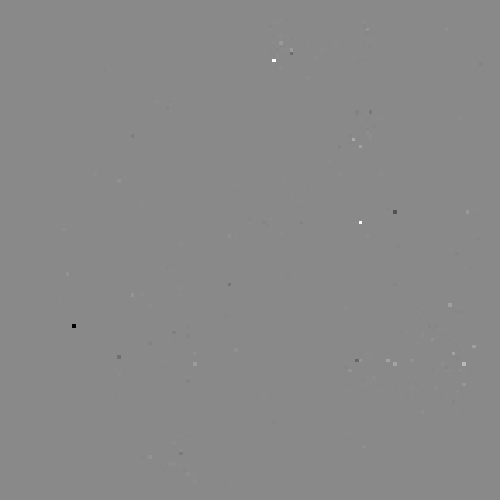

In [11]:

# setup toolbar
# sys.stdout.write("[%s]" % (" " * toolbar_width))
# sys.stdout.flush()
# sys.stdout.write("\b" * (toolbar_width+1)) # return to start of line, after '['


m = np.mean( X, axis=0 )
# w=3
w = int(input("What Local Window Size? {1, 2, ..., 145}: "))
# now, lets process each pixel!
# print("get a cup of coffee")
RXresult = np.zeros(shape=(Xdim,Ydim))

print("please wait")     
for i in range(w,Xdim-w,1):
    for j in range(w,Ydim-w,1):
            
        dataset = np.ndarray( shape=((w*2+1)*(w*2+1),Bands) )
#         print(dataset)
        ctr = 0

        for a in range(-w,w+1,1):
            for b in range(-w,w+1,1):
                dataset[ctr,:] = data[i+a,j+b,:]
                ctr = ctr + 1

        lm = np.mean(dataset)

        C = np.cov(np.matrix.transpose(dataset))
        covInv = np.linalg.inv(C)
        
#         if( np.linalg.det( C ) < 0.00001 ):
#             Pad = 0.1 * np.identity(Bands); # make an "identity matrix" and put some small padding along it!
#             C = np.add( C , Pad );
          
#         covInv = C
        #Run RX
        xu = (data[i,j,:]- lm).T
        
        result = np.matmul(np.matmul(xu.T,covInv),xu)
        RXresult[i,j] = result
#         sys.stdout.write("-")
#         sys.stdout.flush()
# lets show it
# sys.stdout.write("\n")
newm = np.amin(RXresult)
RXresult = RXresult - newm
newm = np.amax(RXresult)
RXresult = (RXresult / newm) * 255

# now, we make our image and fill it (the slow way!)
scaledResult = Image.new("RGB", (Xdim, Ydim))
for i in range(Xdim):
    for j in range(Ydim):
        scaledResult.putpixel( (i,j) , (int(RXresult[i,j]),int(RXresult[i,j]),int(RXresult[i,j]) ) )
display(scaledResult.resize((500,500),Image.NEAREST))


# Task 5 (graduate students)

Go to

http://www.ehu.eus/ccwintco/index.php/Hyperspectral_Remote_Sensing_Scenes

or

http://lesun.weebly.com/hyperspectral-data-set.html

Prompt the user for which data set to load and process (Tasks 1-4), i.e., Indian Pines or {Salinas, Pavia, Washington DC MALL, ...}

# Task 6 (graduate students)

W.r.t. Tasks 1-4, ask the user if they want to remove the water absorption bands (and do it if so!!!)

# Task 7 (graduate students)

W.r.t. Tasks 3 and 4, prompt the user for the size of a buffer window. For example, say we picked a 5 by 5 size local window with a buffer of size 1. The locations we would sample from would look like:

\begin{bmatrix}
   1 & 1 & 1 & 1 & 1 \\
   1 & 0 & 0 & 0 & 1 \\
   1 & 0 & 2 & 0 & 1 \\
   1 & 0 & 0 & 0 & 1 \\
   1 & 1 & 1 & 1 & 1 \\   
\end{bmatrix}

where 2) is our pixel location, 0) are buffer pixels we ignore, and the mean and covariance are computed with respect to 1) locations.

# Task 8 (extra credit)

Produce (and display) an "RGB" image for the Indian Pines data set

Do it w.r.t. 

1) the mean spectral band for red, green, and blue

2) the full red, green, and blue distributions

In [12]:
def scaleArray(array):
    newarray = np.amin(array)
    array = array - newarray
    newarray = np.amax(array)
    array = (array / newarray) * 255
    return array.astype(int)


red = np.array(data[:,:,31])
red = scaleArray(red)
green = np.array(data[:,:,12])
green = scaleArray(green)
blue = np.array(data[:,:,9])
blue = scaleArray(blue)

image = np.zeros((Xdim,Ydim,3),'uint8')
image[:,:,0] = red
image[:,:,1] = green
image[:,:,2] = blue

result = Image.fromarray(image)

display(result.resize((300,300),Image.NEAREST))

In [14]:
from scipy.stats import truncnorm

def getBandRange(lower,upper):
    bandRange = range(lower,upper,1)
    numBands = upper-lower
#     print(numBands)
    middleVal = numBands/2
    #Create a weighting vector from 0 to .5 with uniform intervals dependant on the number of Bands
    distArray = list(np.arange(0,0.5, .5/numBands))
    colorArray = np.zeros((Xdim,Ydim),'uint8')
#     print(distArray)
    for i in range(Xdim):
        for j in range(Ydim) :
            colorVal = 0
            bandCount = 0
            for a in bandRange:
                colorVal += data[i,j,a]*distArray[bandCount]
                if(bandCount < int(middleVal) -1):
                      bandCount += 1
                else: bandCount = bandCount-1

            colorVal = colorVal/numBands
            colorArray[i,j] = colorVal
    return scaleArray(colorArray)
    
image = np.zeros((Xdim,Ydim,3),'uint8')
image[:,:,0] = getBandRange(30,35)
image[:,:,1] = getBandRange(13,18)
image[:,:,2] = getBandRange(7,12)

result = Image.fromarray(image)

display(result.resize((300,300),Image.NEAREST))

# Task 9 (extra credit)

Find "a few good bands" (e.g., 2 or 5 or 10 vs. 220) to detect "stone-steel-tower" in Indian Pines, then apply ACE